In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [4]:
# no EDMF
ds_no=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_nomfc/mld_201[6,7].nc')
ds_no=ds_no.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_no=ds_no.isel(x=slice(4,-4),y=slice(4,-4))
ds_no.coords['year']=ds_no.time_counter.dt.year
ds_no.coords['month']=ds_no.time_counter.dt.month
ds_no.coords['day']=ds_no.time_counter.dt.day
ds_no.coords['dayofyear']=ds_no.time_counter.dt.dayofyear

# original EDMF
ds_c0=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_mfcori/mld_201[6,7].nc')
ds_c0=ds_c0.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_c0=ds_c0.isel(x=slice(4,-4),y=slice(4,-4))
ds_c0.coords['year']=ds_c0.time_counter.dt.year
ds_c0.coords['month']=ds_c0.time_counter.dt.month
ds_c0.coords['day']=ds_c0.time_counter.dt.day
ds_c0.coords['dayofyear']=ds_c0.time_counter.dt.dayofyear

# EDMF case 1 - alpha +beta
ds_c1=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc1/mld_201[6,7].nc')
ds_c1=ds_c1.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_c1=ds_c1.isel(x=slice(4,-4),y=slice(4,-4))
ds_c1.coords['year']=ds_c1.time_counter.dt.year
ds_c1.coords['month']=ds_c1.time_counter.dt.month
ds_c1.coords['day']=ds_c1.time_counter.dt.day
ds_c1.coords['dayofyear']=ds_c1.time_counter.dt.dayofyear

# EDMF case 2  - density
ds_c2=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc2/mld_201[6,7].nc')
ds_c2=ds_c2.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_c2=ds_c2.isel(x=slice(4,-4),y=slice(4,-4))
ds_c2.coords['year']=ds_c2.time_counter.dt.year
ds_c2.coords['month']=ds_c2.time_counter.dt.month
ds_c2.coords['day']=ds_c2.time_counter.dt.day
ds_c2.coords['dayofyear']=ds_c2.time_counter.dt.dayofyear

# EDMF case 4 - background value
ds_c4=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/mld_201[6,7].nc')
ds_c4=ds_c4.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_c4=ds_c4.isel(x=slice(4,-4),y=slice(4,-4))
ds_c4.coords['year']=ds_c4.time_counter.dt.year
ds_c4.coords['month']=ds_c4.time_counter.dt.month
ds_c4.coords['day']=ds_c4.time_counter.dt.day
ds_c4.coords['dayofyear']=ds_c4.time_counter.dt.dayofyear


# EVD - no precipitation
ds_no_p0=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre00_prsn00_2012_nomfc/mld_201[6,7].nc')
ds_no_p0=ds_no_p0.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_no_p0=ds_no_p0.isel(x=slice(4,-4),y=slice(4,-4))
ds_no_p0.coords['year']=ds_no_p0.time_counter.dt.year
ds_no_p0.coords['month']=ds_no_p0.time_counter.dt.month
ds_no_p0.coords['day']=ds_no_p0.time_counter.dt.day
ds_no_p0.coords['dayofyear']=ds_no_p0.time_counter.dt.dayofyear

# EVD_ 10% precipitation
ds_no_p1=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre01_prsn01_2012_nomfc/mld_201[6,7].nc')
ds_no_p1=ds_no_p1.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
ds_no_p1=ds_no_p1.rename({'x_grid_T':'x','y_grid_T':'y'})
ds_no_p1=ds_no_p1.isel(x=slice(4,-4),y=slice(4,-4))
ds_no_p1.coords['year']=ds_no_p1.time_counter.dt.year
ds_no_p1.coords['month']=ds_no_p1.time_counter.dt.month
ds_no_p1.coords['day']=ds_no_p1.time_counter.dt.day
ds_no_p1.coords['dayofyear']=ds_no_p1.time_counter.dt.dayofyear


# Bathymetry
bat=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')
bat.coords['lon']=bat.nav_lon
bat.coords['lat']=bat.nav_lat
bat['mask_tc']=np.zeros((len(bat.y),len(bat.x)))*(bat.bathy_meter.where(bat.bathy_meter<2500))+1
bat['mask_tc']=bat.mask_tc.where(((bat.mask_tc==1)&(bat.glamt<4.3)&(bat.glamt>0.5)&(bat.gphit>-65.5)),other=0)
mask_tc=bat.mask_tc
mask_tc.load()
mask_tc[173,98]=1
mask_tc[178,109]=0

bat['mask_tc']=mask_tc


In [3]:
y=2016
(ds_c0.mldr10_1.where(ds_c0.year==y)-ds_c1.mldr10_1.where(ds_c1.year==y)).min().values

/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


array(0., dtype=float32)

/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarn

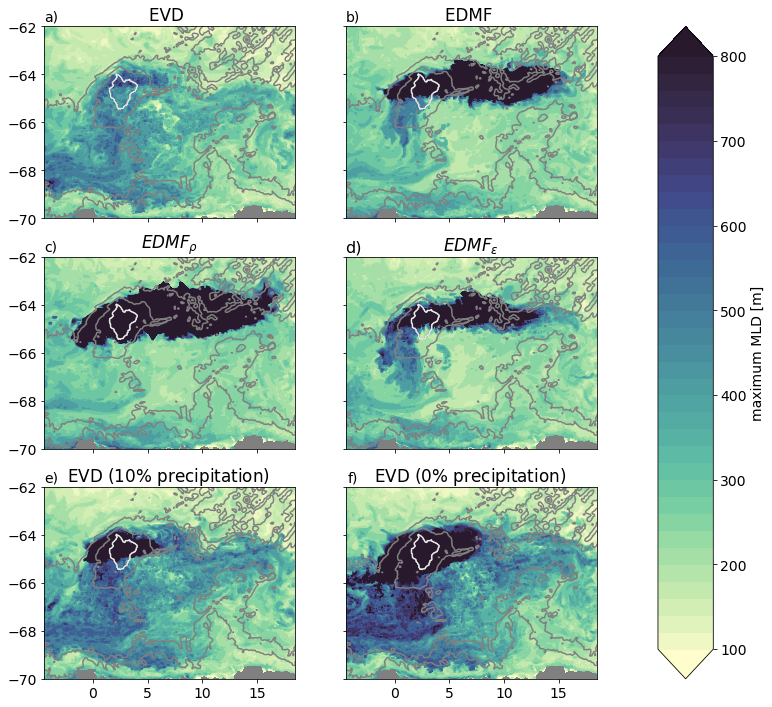

In [8]:
y=2016

fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,2, width_ratios=[1,.1],wspace=.2)#,wspace=0.3)
gs1 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], width_ratios=[1])
gs2 = GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[0], width_ratios=[1,1])
col_ax = fig.add_subplot(gs1[0,0])
ax1 = fig.add_subplot(gs2[0,0])
ax2 = fig.add_subplot(gs2[0,1])
ax3 = fig.add_subplot(gs2[1,0])
ax4 = fig.add_subplot(gs2[1,1])
ax5 = fig.add_subplot(gs2[2,0])
ax6 = fig.add_subplot(gs2[2,1])


vamin = 100
vamax = 800
lev   = 36

ax=ax1
ds_no.mldr10_1.where(ds_no.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='w',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EVD ')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('')
ax.text(0.03, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax2   
ds_c0.mldr10_1.where(ds_c0.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='w',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EDMF ')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('')
ax.text(0.03, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax3 
ds_c2.mldr10_1.where(ds_c2.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='w',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('$EDMF_{\\rho}$')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.text(0.03, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax4
cbm=ds_c4.mldr10_1.where(ds_c4.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='w',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('$EDMF_{\\epsilon}$')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.text(0.03, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='16')

ax=ax5
ds_no_p1.mldr10_1.where(ds_no_p1.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='w',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EVD (10$\%$ precipitation) ')
ax.set_xlabel('')
ax.set_ylabel('')
ax.text(0.03, 1.05, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax6
ds_no_p0.mldr10_1.where(ds_no_p0.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='w',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EVD (0$\%$ precipitation) ')
ax.set_xlabel('')
ax.set_yticklabels([])
ax.set_ylabel('')
ax.text(0.03, 1.05, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')


plt.colorbar(cbm,cax=col_ax,label='maximum MLD [m]',ticks=np.linspace(100,800,8))
plt.savefig(f'./max_mld_edmfs_{y}_plusextra.jpg',dpi=300)